## Perkenalan

Nama Kelompok :
- Reynaldi Ananda Putra
- Desmonda Zefanya Namora Putri Manurung
- Reva Fahrian

Pada final project 1 ini menggunakan data yang bersumber dari kaggle yaitu data Uber
and Lyft Dataset Boston, terdiri dari 57 atribut tetapi yang paling relevan untuk digunakan dalam pemodelan hanya 10 atribut data.


Tujuan dari project ini adalah untuk memprediksi harga perjalanan menggunakan taksi Uber dan Lyft.

Link dataset : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/

In [ ]:
# Data Manipulasi dan analisis
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning dan pemodelan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd

In [ ]:
# Membaca Data
df=pd.read_csv("rideshare_kaggle.csv")

In [ ]:
# Menampilkan 5 Data Teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# Menngetahui keberadaan missing value dan tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berdasarkan proses diatas diperoleh informasi yaitu data terdiri dari 693071 baris dan 57 kolom. terdapat kolom dengan tipe data float berjumlah 29, 17 kolom bertipe integer, dan bertipe object terdapat 11 kolom.

Pada Kolom price memiliki 637976 baris yang tidak NULL dari 693071 total baris keseluruhan. artinya terdapat missing value yang harus dibersihkan sebelum mengolah data lebih lanjut.

In [ ]:
#mengubah kolom 'datetime' dalam DataFrame menjadi objek tipe data datetime
#berguna jika kolom 'datetime' dalam DataFrame Anda awalnya dalam format yang tidak terinterpretasi secara otomatis sebagai tipe data datetime oleh pandas.

df['datetime']=pd.to_datetime(df['datetime'])

## Data Cleaning

In [ ]:
# Cleansing data dengan standar missing value

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari output di atas dapat kita ketahui bahwa pada kolom 'price' terdapat missing value atau nilai NULL sebanyak 55.095, maka data harus dibersihkan. data dibersihkan dengan cara mengganti nilai null dengan mengisi menggunakan nilai MEAN

In [ ]:
mean= df['price'].mean()
mean

16.545125490614065

Mean dari kolom price pada data tersebut adalah 16.545 sehingga kita akan mengisi baris kosong kolom price dengan nilai 16.545

In [ ]:
df['price'].fillna(mean, inplace=True)

In [ ]:
df.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [ ]:
#mengetahui nilai mean kolom price yang telah diperbaiki
mean= df['price'].mean()
mean

16.545125490614062

Mengisi baris kosong pada kolom price menggunakan nilai mean sebesar 16.545 tidak merubah nilai mean pada kolom price didalam datasetnya

## Handling Duplicated Values

In [ ]:
# Mengetahui jumlah duplicated values

df.duplicated().sum()


0

Duplicated values yang ditampilkan adalah 0, maka berarti tidak ada duplicated value pada dataset tersebut. Selanjutnya kita ingin mengetahui macam-macam product yang dimiliki Uber dan Lyft. Kita dapat memperoleh informasi tersebut dari kolom name.

In [ ]:
#mengetahui nama product yang disediakan Uber dan Lyft
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [ ]:
df['name'] = df['name'].str.replace('Black SUV', 'BlackSUV')
df['name'] = df['name'].str.replace('Lyft Black XL', 'LyftBlackXL')
df['name'] = df['name'].str.replace('Lyft XL', 'LyftXL')
df['name'] = df['name'].str.replace('Lux Black XL', 'LuxBlackXL')
df['name'] = df['name'].str.replace('Lux Black', 'LuxBlack')

In [ ]:
#memastikan bahwa pengeditan telah berhasil
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack',
       'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool', 'Taxi'],
      dtype=object)

Product yang tersedia dari kedua penyedia layanan tersebut adalah Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack', 'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool', 'Taxi''

## Exploration Data Analysis (EDA)

In [ ]:
#menampilkan bentuk data yang akan dianalisis
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,LuxBlackXL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,LyftXL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Karena tujuan kita adalah memprediksi harga perjalanan (target=price) maka perlu dilakukan analisis terhadap Harga perjalanan (perbandingan Uber dan Lyft)

In [ ]:
# Mengetahui jumlah kolom yang dimiliki
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

### Measure of Central Tendency

In [ ]:
#mengetahui rata-rata harga pemesanan taksi
df['price'].mean()

16.545125490614062

In [ ]:
#mengetahui median/ nilai tengah kolom price
df['price'].median()

16.0

In [ ]:
#mengetahui produk apa yang paling sering digunakan (Lyft/Uber)
df['cab_type'].mode()

0    Uber
Name: cab_type, dtype: object

### Measure of Spread/ Dispersion (Variability)

In [ ]:
#mengetahui ukuran penyebaran data melalui standar deviasi
std_price=df['price'].std(ddof=1)
std_timestamp=df['timestamp'].std(ddof=1)
print("deviasi standar harga taksi :", std_price, "USD")
print("deviasi standar durasi perjalanan :", std_timestamp, "detik")

deviasi standar harga taksi : 8.946069063703149 USD
deviasi standar durasi perjalanan : 689192.4925855091 detik


In [ ]:
#mengetahui ukuran penyebaran data melalui skewnes
df['price'].skew()

1.0899667817227607

### Measure of Correlation dan Penerapanya

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\1091767541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cab_type', y='price', data=df, palette='Reds');


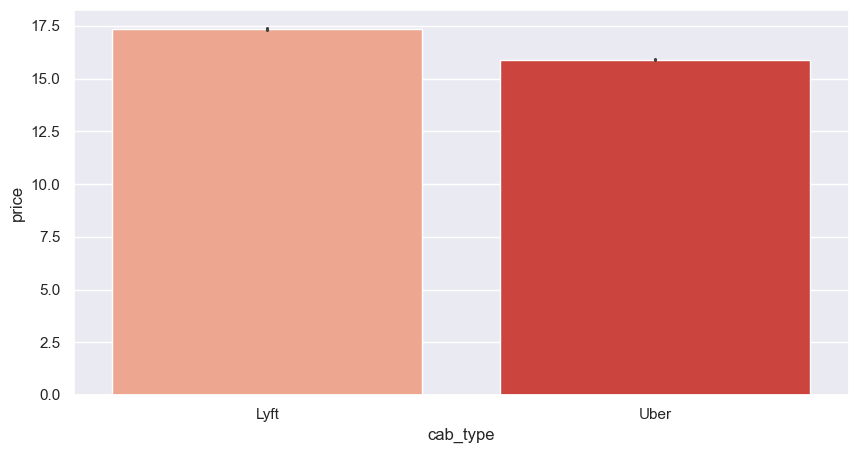

In [ ]:
#Perbandingan harga perjalanan menggunakan Uber dan Lyft
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='cab_type', y='price', data=df, palette='Reds');


In [ ]:
df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.902455
Name: price, dtype: float64

Berdasarkan barplot dan informasi diatas diketahui bahwa Lyft memiliki harga rata-rata lebih tiggi dari Uber, Selanjutnya kita akan melihat perbandingan jumlah pengguna layanan Lyft dan Uber

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\1285625318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cab_type', data=df, palette='Oranges');


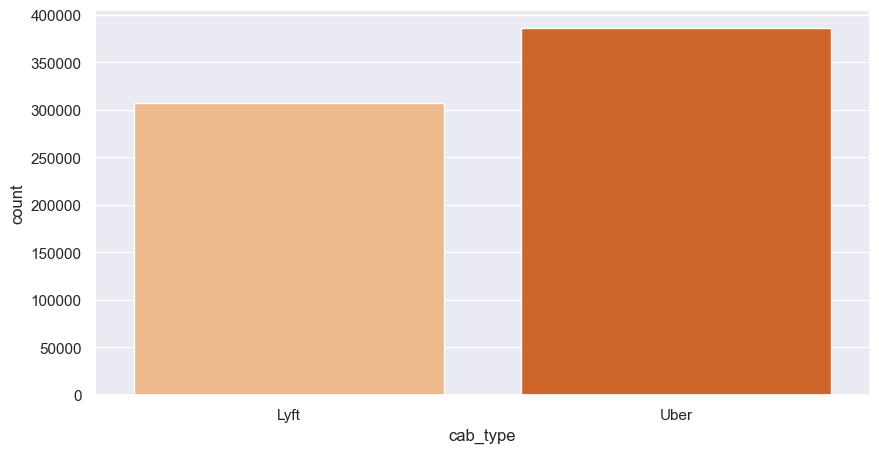

In [ ]:
#Perbandingan jumlah pengguna layanan Lyft dan Uber
sns.countplot(x='cab_type', data=df, palette='Oranges');

Melalui countplot tersebut, diperoleh bahwa pengguna Uber lebih banyak daripada pengguna Lyft. Uber dan Lyft masing-masing memiliki jenis taksi yang berbeda. Oleh karena itu, untuk selanjutnya akan dianalisis terkait hubungan antara tarif perjalanan dengan jenis taksi yang dimiliki Uber maupun Lyft.

<Axes: xlabel='price', ylabel='name'>

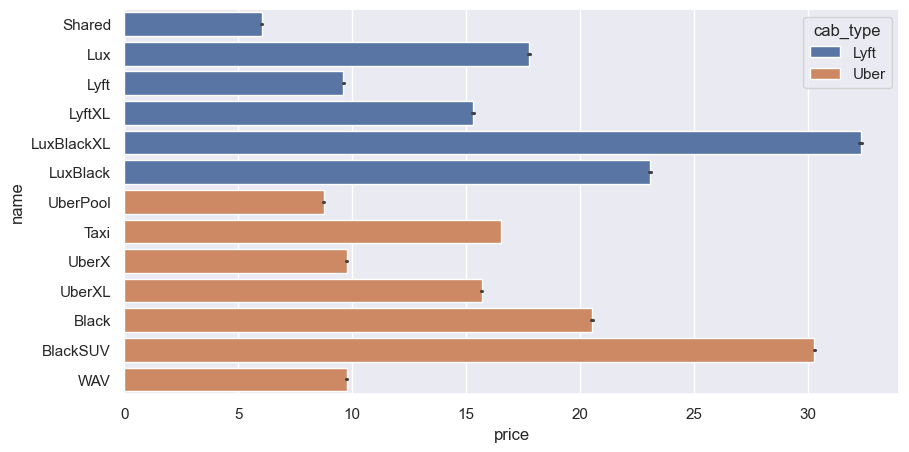

In [ ]:
#Cek pengaruh jenis taksi Uber dan Lyft terhadap tarif perjalanan
df.sort_values('cab_type', inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(y='name', x='price', data=df, hue='cab_type')

In [ ]:
df.groupby('name')['price'].mean()

name
Black         20.523786
BlackSUV      30.286763
Lux           17.771240
LuxBlack      23.062468
LuxBlackXL    32.324086
Lyft           9.610885
LyftXL        15.309363
Shared         6.029893
Taxi          16.545125
UberPool       8.752500
UberX          9.765074
UberXL        15.678144
WAV            9.765019
Name: price, dtype: float64

Taksi Lyft yang memiliki rata-rata harga paling mahal adalah LuxBlackXL yaitu 32.324086. Sedangkan, Shared adalah jenis taksi Lyft yang memeiliki rata-rata harga paling murah sebesar 6.029893

Taksi Uber yang memiliki rata-rata harga paling mahal adalah BlackSUV sebesar 30.286763. Sedangkan, UberPool adalah jenis taksi Uber yang memeiliki rata-rata harga paling murah sebesar 8.752500

Jadi jenis taksi yang dipilih pelanggan mempengaruhi harga perjalanan mereka.

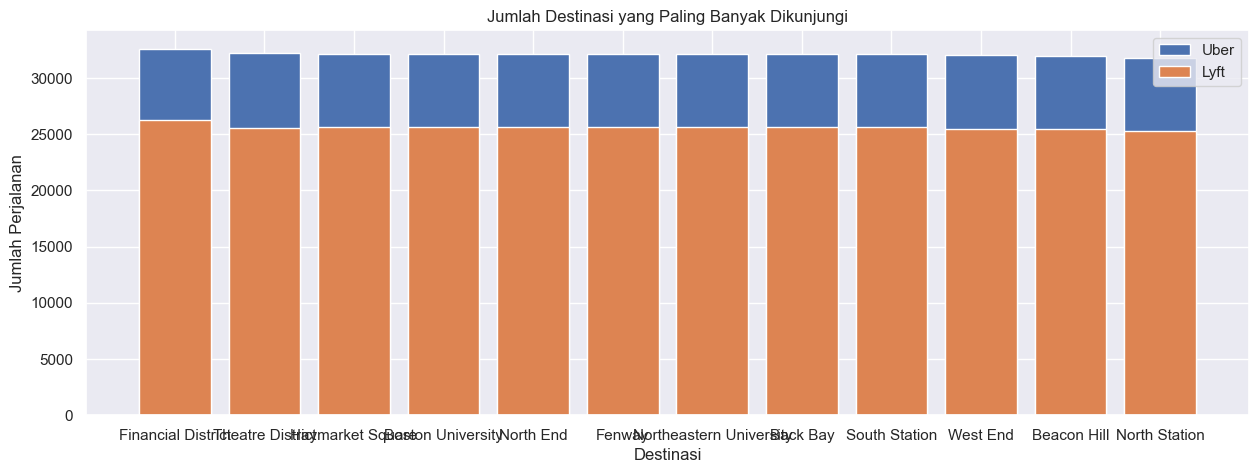

In [ ]:
# Split data by provider
uber_df = df[df["cab_type"] == "Uber"]
lyft_df = df[df["cab_type"] == "Lyft"]

# Count the number of trips to each destination
uber_dest_counts = uber_df["destination"].value_counts()
lyft_dest_counts = lyft_df["destination"].value_counts()

# Plot the results
plt.figure(figsize=(15, 5))
plt.bar(list(uber_dest_counts.index), uber_dest_counts.values, label="Uber")
plt.bar(list(lyft_dest_counts.index), lyft_dest_counts.values, label="Lyft")
plt.title("Jumlah Destinasi yang Paling Banyak Dikunjungi")
plt.xlabel("Destinasi")
plt.ylabel("Jumlah Perjalanan")
plt.legend()
plt.show()

In [ ]:
# Get the top destination for each provider
uber_top_dest = uber_dest_counts.sort_values(ascending=False).index[0]
lyft_top_dest = lyft_dest_counts.sort_values(ascending=False).index[0]

# Get the number of trips to the top destination for each provider
uber_top_dest_trips = uber_dest_counts[uber_top_dest]
lyft_top_dest_trips = lyft_dest_counts[lyft_top_dest]

# Print the results
print("Provider | Destinasi | Jumlah Perjalanan")
print("------- | -------- | --------")
print(f"Uber | {uber_top_dest} | {uber_top_dest_trips}")
print(f"Lyft | {lyft_top_dest} | {lyft_top_dest_trips}")

Provider | Destinasi | Jumlah Perjalanan
------- | -------- | --------
Uber | Financial District | 32613
Lyft | Financial District | 26238


Berdasarkan hasil visualisasi, destinasi yang paling banyak dikunjungi oleh Uber adalah Financial District, dengan jumlah perjalanan sebanyak 32613 perjalanan. Destinasi yang paling banyak dikunjungi oleh Lyft adalah Financial District, dengan jumlah perjalanan sebanyak 26238. Financial District menjadi destinasi yang paling banyak dikunjungi dari kedua platform tersebut.

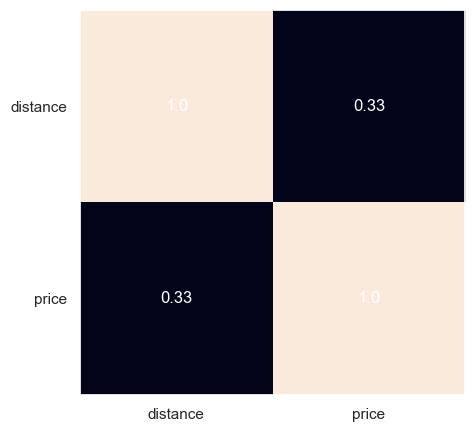

In [ ]:
#Korelasi jarak dengan tarif perjalana
matrix= np.corrcoef(df['distance'], df['price']).round(decimals=3)
fig, ax= plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('distance', 'price'))
ax.yaxis.set(ticks=(0,1), ticklabels=('distance', 'price'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='w')
plt.show()

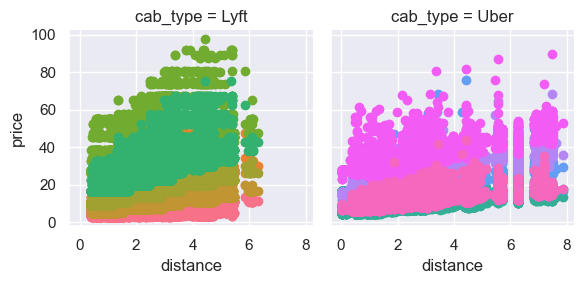

In [ ]:
g= sns.FacetGrid(df, col='cab_type', hue='name')
g.map(plt.scatter, 'distance', 'price')
plt.show()

Setiap warna pada grafik tersebut mempresentasikan jenis taksi yang dimiliki oleh Uber dan Lyft. Terlihat bahwa tarif perjananan taksi yang dimiliki Lyft lebih besar dari pada Uber meskipun jarak yang ditempuh tidak jauh berbeda. Dari grafik tersebut juga terlihat bahwa jenis taksi mempengaruhi harga. Korelasi antara jarak dan perjalanan memiliki koefisien korelasi sebesar 0,33. Artinya korelasi jarak dan tarif perjalanan dapat dikategorikan cukup berkorelasi.

In [ ]:
# Set the maximum number of rows to be displayed
pd.set_option('display.max_rows', 72)

# Group the data by source and destination
grouped_df = df.groupby(by=["source", "destination"])

# Calculate the mean price for each group
mean_prices = grouped_df["price"].agg(["mean"])

# Sort the data by mean price
sorted_mean_prices = mean_prices.sort_values(by="mean", ascending=False)

# Print the results
print(sorted_mean_prices)

                                                      mean
source                  destination                       
Financial District      Boston University        24.787591
Boston University       Financial District       23.542611
Fenway                  Financial District       22.894073
Financial District      Fenway                   22.862157
Northeastern University Financial District       22.105854
Financial District      Northeastern University  21.494936
Theatre District        Boston University        20.057057
Boston University       North Station            19.897346
Northeastern University North Station            19.641437
Fenway                  North Station            19.449005
North End               Back Bay                 19.312528
North Station           Northeastern University  19.298220
Back Bay                North End                19.240792
South Station           Back Bay                 18.901507
Theatre District        Fenway                   18.8674

Berdasarkan tabel tersebut, perjalanan dengan harga rata-rata termahal adalah dari Financial District ke Boston University sebesar 24.61. Perjalanan dengan harga rata-rata termurah adalah dari Haymarket Square ke North Station sebesar 12.42 USD.

In [ ]:
df2 = df[["cab_type","name","hour","day","month","source","destination","price","distance","short_summary","temperature","visibility","windSpeed","surge_multiplier"]]
df2

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,windSpeed,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,8.66,1.0
543594,Lyft,Lux,11,17,12,Back Bay,North End,22.5,2.98,Overcast,34.87,8.275,7.37,1.0
543596,Lyft,Lyft,11,17,12,Haymarket Square,Financial District,7.0,1.01,Overcast,34.87,8.275,7.37,1.0
543597,Lyft,Lux,11,17,12,Haymarket Square,Financial District,11.0,1.01,Overcast,34.87,8.275,7.37,1.0
543598,Lyft,LyftXL,14,14,12,Haymarket Square,Financial District,11.0,1.01,Clear,36.08,9.832,3.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297546,Uber,UberPool,6,26,11,Back Bay,North End,10.0,3.16,Overcast,41.83,5.589,1.83,1.0
297545,Uber,UberX,6,26,11,West End,South Station,7.0,1.26,Overcast,41.83,5.589,1.83,1.0
297544,Uber,BlackSUV,6,26,11,West End,South Station,27.5,1.26,Overcast,41.83,5.589,1.83,1.0
297470,Uber,WAV,4,29,11,Northeastern University,Back Bay,8.5,1.64,Mostly Cloudy,38.18,10.000,8.52,1.0


In [ ]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns =["cab_type","name","hour","day","month","source","destination",
                                                   "price","distance","short_summary","windSpeed","temperature","visibility","surge_multiplier"]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_enc = encoding_pipeline.fit_transform(df2)
df_enc

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,windSpeed,surge_multiplier
0,0,7,9,9,1,5,7,4,15,4,205,226,231,0
543594,0,2,11,10,1,0,6,47,269,5,72,82,199,0
543596,0,5,11,10,1,5,4,8,72,5,72,82,199,0
543597,0,2,11,10,1,5,4,20,72,5,72,82,199,0
543598,0,6,14,7,1,5,4,20,72,0,83,146,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297546,1,9,6,12,0,0,6,17,287,5,190,63,13,0
297545,1,10,6,12,0,11,9,8,97,5,190,63,13,0
297544,1,1,6,12,0,11,9,57,97,5,190,63,13,0
297470,1,12,4,15,0,8,0,13,135,4,111,226,229,0


In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   cab_type          693071 non-null  int32
 1   name              693071 non-null  int32
 2   hour              693071 non-null  int64
 3   day               693071 non-null  int64
 4   month             693071 non-null  int64
 5   source            693071 non-null  int32
 6   destination       693071 non-null  int32
 7   price             693071 non-null  int64
 8   distance          693071 non-null  int64
 9   short_summary     693071 non-null  int32
 10  temperature       693071 non-null  int64
 11  visibility        693071 non-null  int64
 12  windSpeed         693071 non-null  int64
 13  surge_multiplier  693071 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 66.1 MB


In [ ]:
x = df_enc.drop(["price"], axis=1)
x.shape

(693071, 13)

In [ ]:
y = df_enc['price']
y.shape

(693071,)

In [ ]:
x_fit = df_enc[['name','distance','surge_multiplier','cab_type','destination',
               'source','visibility','windSpeed','short_summary','day']]
x_fit

,name,distance,surge_multiplier,cab_type,destination,source,visibility,windSpeed,short_summary,day
0,7,15,0,0,7,5,226,231,4,9
543594,2,269,0,0,6,0,82,199,5,10
543596,5,72,0,0,4,5,82,199,5,10
543597,2,72,0,0,4,5,82,199,5,10
543598,6,72,0,0,4,5,146,63,0,7
...,...,...,...,...,...,...,...,...,...,...
297546,9,287,0,1,6,0,63,13,5,12
297545,10,97,0,1,9,11,63,13,5,12
297544,1,97,0,1,9,11,63,13,5,12
297470,12,135,0,1,0,8,226,229,4,15


## Definisi Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_fit, y, test_size=0.20)

## Linear Regression

In [ ]:
X_test.shape

(138615, 10)

In [ ]:
Y_test.shape

(138615,)

In [ ]:
X_train.shape

(554456, 10)

In [ ]:
Y_train.shape

(554456,)

In [ ]:
lr = LinearRegression().fit(X_train,Y_train)

In [ ]:
print('intercept: ', lr.intercept_)
print('slope: ', lr.coef_)

intercept:  35.413397499161874
slope:  [-3.43910456e+00  6.20183111e-02  1.14171119e+01  7.92955454e+00
  3.92203269e-02  6.91811925e-02 -1.43508236e-04 -2.73778182e-04
  1.60858470e-02  2.43217421e-04]


Pada analisis regresi linear ini, didapatkan nilai intercept sekitar 35.48 yang berarti nilai respons yang diprediksi ketika fitur bernilai sama dengan 0. Peningkatan x_1 sebesar 1 menghasilkan kenaikan respons yang diprediksi sebesar -3.44, x_2 mengalami peningkatan sebesar 1 akan menghasilkan kenaikan respons yang diprediksi sebesar 6.20e-02, dan seterusnya.

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([53.82865759, 20.18127952, 21.84206926, ..., 27.95288718,
       44.5990053 , 28.07354463])

In [ ]:
y_pred.shape

(138615,)

In [ ]:
print('Linear Regression train R-squared : %.4f' % lr.score(X_train, Y_train))
print('Linear Regression test R-squared : %.4f' % lr.score(X_test, Y_test))

Linear Regression train R-squared : 0.5084
Linear Regression test R-squared : 0.5084


In [ ]:
lr_mse = mean_squared_error(y_pred, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 14.4550


Hasil yang ditampilkan adalah :

Linear Regression train dan test R-squared dengan angka 0.5084, linear regression RMSE sebesar 14.4550

### Decision Tree

In [ ]:
dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, Y_train)

y_pred2 = dt_model.predict(X_test)
l_dt_train_r2 = dt.score(X_train,Y_train)
l_dt_test_r2 = dt.score(X_test, Y_test)
print('Decision Tree train R squared : %.4f' % l_dt_train_r2)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

Decision Tree train R squared : 0.9928
Decision Tree test R squared": 0.9421


In [ ]:
dt_mse = mean_squared_error(y_pred2, Y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree Regressor RMSE: 4.9623


Hasil yang ditampilkan pada Decision Tree adalah :

Decision Tree train R-squared sebesar 0.9928 dan test R-squared dengan angka 0.9421, Decision Tree Regressor RMSE sebesar 4.9623

## Kesimpulan


Dari analisis model yang telah dilakukan, diperoleh beberapa kesimpulan :

Terdapat 10 atribut/faktor yang mempengaruhi tarif taksi online, diantaranya yaitu name, distance, surge_multiplier, cab_type, destination, source, visibility, windSpeed, short_summary, dan day.
Metode yang paling tepat digunakan dalam pembuatan model adalah metode Decision Tree, karena tingkat akurasinya tertinggi daripada Regresi Linear. Tingkat akurasi pada Decision Tree mencapai 94.25% dengan Mean Squared Error yaitu 4.94, sedangkan tingkat akurasi pada Linear Regression mencapai 50.86% dengan Mean Squared Error sebesar 14.47